In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

from pymoo.optimize import minimize
from pymoo.model.problem import Problem
from pymoo.algorithms.nsga2 import NSGA2

In [2]:
dados_treinamento = pd.read_csv('../data/train.zip')
dados_teste = pd.read_csv('../data/test.zip')

In [3]:
treinamento = dados_treinamento.drop(labels = ['label'], axis = 1)
treinamento = np.array(treinamento, dtype = np.float32)

In [4]:
teste = np.array(dados_teste, dtype = np.float32)

In [5]:
labels = dados_treinamento['label']
labels = np.array(labels)

In [6]:
knn4 = cv2.ml.KNearest_create()
knn4.train(treinamento, cv2.ml.ROW_SAMPLE, labels)

True

In [7]:
ret, result, neighbours, dist = knn4.findNearest(teste, k=3)

In [8]:
result

array([[2.],
       [0.],
       [9.],
       ...,
       [3.],
       [9.],
       [2.]], dtype=float32)

In [9]:
numeros, contador = np.unique(result, return_counts=True)
dict(zip(numeros, contador))

{0.0: 2816,
 1.0: 3315,
 2.0: 2767,
 3.0: 2781,
 4.0: 2736,
 5.0: 2521,
 6.0: 2765,
 7.0: 2931,
 8.0: 2575,
 9.0: 2793}

In [10]:
result[:10]

array([[2.],
       [0.],
       [9.],
       [9.],
       [3.],
       [7.],
       [0.],
       [3.],
       [0.],
       [3.]], dtype=float32)

In [11]:
teste_reshaped = dados_teste.values.reshape(-1,28,28,1)
treinamento_reshaped = treinamento.reshape(-1,28,28,1)

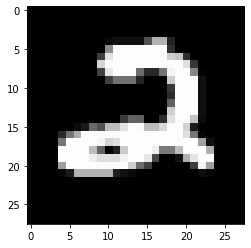

In [12]:
plt.imshow(teste_reshaped[0], cmap = 'gray')

In [172]:
resultado = []

In [174]:
for i in range(len(result)):
    resultado.append(int(result[i][0]))

In [176]:
submissao = pd.DataFrame(resultado, columns = ['Label'])

In [177]:
submissao.to_csv('D:/Dados/Desktop/R/Kaggle - Digit Recognizer/submissao.csv', index = False)

In [31]:
knn_comparacao = cv2.ml.KNearest_create()
knn_comparacao.train(treinamento[0:40000], cv2.ml.ROW_SAMPLE, labels[0:40000])

True

In [69]:
class MinimizarErro(Problem):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.gen = 1
    def _evaluate(self, x, out, *args, **kwargs):
        erro = []
        print(f'Geração {self.gen}')
        for x_vals in x:
            ret, result, neighbours, dist = knn_comparacao.findNearest(treinamento[40000:], k = int(np.round(x_vals)))
            erro.append(1 - accuracy_score(result, labels[40000:]))
        
        self.gen += 1
        out["F"] = np.array(erro)

In [70]:
modelo_otimizacao = MinimizarErro(n_var=1, n_obj=1, xl=[1], xu=[10])
algoritmo = NSGA2(pop_size = 10)
criterio_parada = ('n_gen', 5)
results = minimize(problem = modelo_otimizacao, algorithm = algoritmo, termination = criterio_parada)

Geração 1
Geração 2
Geração 3
Geração 4
Geração 5


In [71]:
results.F[-1]

array([0.032])

In [72]:
np.round(results.X[-1])

array([3.])

In [53]:
ret, result, neighbours, dist = knn_comparacao.findNearest(treinamento[40000:], k = 6)

In [54]:
1- accuracy_score(result, labels[40000:])

0.03500000000000003

In [ ]:
k = 1 -> 0.0335
k = 2 -> 0.0395
k = 3 -> 0.0320
k = 4 -> 0.0335
k = 5 -> 0.0330
k = 6 -> 0.0350